# **TEVA model run**
*Notebook by Ali Dadkhah  |  adadkhah@uvm.edu*

In [1]:
import teva
import logging
from teva.utilities import flatten_dict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading data and preparing it for TEVA

In [ ]:
# Data
data = pd.read_csv('Sample_Data/CAMELS_attrib_v4_2_Jun12_2019_updated.csv', skiprows=1)

# list of input featuers
input_features_list = data.iloc[:, 6:-1].columns.tolist()

# reformat the data
classifications =data['DOC_Class'].to_numpy()
observation_table = data[input_features_list].to_numpy()

# Other variables
n_observations = classifications.shape[0]
n_features = len(input_features_list)
visualize = False
output_logging_level = logging.INFO

### TEVA run

In [3]:
# Algorithm
teva_alg = teva.TEVA(ccea_max_order=n_features,
                     ccea_offspring_per_gen=n_features,
                     ccea_num_new_pop=n_features,
                     ccea_total_generations=60,
                     ccea_n_age_layers=5,
                     # ccea_max_novel_order=4,
                     ccea_gen_per_growth=3,
                     ccea_layer_size=n_features,
                     ccea_archive_offspring_per_gen=25,
                     ccea_p_crossover=0.5,
                     ccea_p_wildcard=0.75,
                     ccea_p_mutation=1 / n_features,
                     ccea_tournament_size=3,
                     ccea_selective_mutation=False,
                     ccea_use_sensitivity=True,
                     ccea_sensitivity_threshold=0,
                     ccea_selection_exponent=5,
                     ccea_fitness_threshold=1 / n_observations,
                     ccea_archive_bin_size=20,

                     dnfea_total_generations=60,
                     dnfea_gen_per_growth=3,
                     dnfea_n_age_layers=5,
                     dnfea_offspring_per_gen=20,
                     dnfea_p_crossover=0.5,
                     dnfea_p_targeted_mutation=0.2,
                     dnfea_p_targeted_crossover=0.25,
                     dnfea_tournament_size=3,
                     dnfea_p_union=0.5,
                     dnfea_p_intersection=0.0,
                     dnfea_selection_exponent=5,
                     dnfea_max_order=12,
                     dnfea_layer_size=20)
                     # dnfea_max_ccs=4)

# Rub the algorithm for the data set
unique_classes = teva_alg.fit(observation_table=observation_table,
                              classifications=classifications)

teva_alg.run_all_targets(logfile_logging_level=logging.INFO,
                         output_logging_level=output_logging_level,
                         visualize=visualize)

2025-05-15 10:42:15,827 - ccea - INFO - Beginning CCEA run with the following parameters:
2025-05-15 10:42:15,827 - ccea - INFO - Features: 58
2025-05-15 10:42:15,827 - ccea - INFO - Target Class: High
2025-05-15 10:42:15,901 - ccea - INFO - T: High | Generation: 1 / 60
2025-05-15 10:42:16,060 - ccea - INFO - T: High | Generation: 2 / 60
2025-05-15 10:42:16,172 - ccea - INFO - T: High | Generation: 3 / 60 : GROWTH
2025-05-15 10:42:16,407 - ccea - INFO - T: High | Generation: 4 / 60
2025-05-15 10:42:16,700 - ccea - INFO - T: High | Generation: 5 / 60
2025-05-15 10:42:16,990 - ccea - INFO - T: High | Generation: 6 / 60 : GROWTH
2025-05-15 10:42:17,345 - ccea - INFO - T: High | Generation: 7 / 60
2025-05-15 10:42:17,807 - ccea - INFO - T: High | Generation: 8 / 60
2025-05-15 10:42:18,288 - ccea - INFO - T: High | Generation: 9 / 60 : GROWTH
2025-05-15 10:42:18,787 - ccea - INFO - T: High | Generation: 10 / 60
2025-05-15 10:42:19,360 - ccea - INFO - T: High | Generation: 11 / 60
2025-05-15

2025-05-15 10:42:20,591 - ccea - ERROR - No potential mates


2025-05-15 10:42:20,675 - ccea - INFO - T: High | Generation: 13 / 60
2025-05-15 10:42:21,464 - ccea - INFO - T: High | Generation: 14 / 60
2025-05-15 10:42:22,199 - ccea - INFO - T: High | Generation: 15 / 60 : GROWTH
2025-05-15 10:42:22,930 - ccea - INFO - T: High | Generation: 16 / 60
2025-05-15 10:42:23,582 - ccea - INFO - T: High | Generation: 17 / 60
2025-05-15 10:42:24,255 - ccea - INFO - T: High | Generation: 18 / 60 : GROWTH
2025-05-15 10:42:25,057 - ccea - INFO - T: High | Generation: 19 / 60
2025-05-15 10:42:25,740 - ccea - INFO - T: High | Generation: 20 / 60
2025-05-15 10:42:26,531 - ccea - INFO - T: High | Generation: 21 / 60 : GROWTH
2025-05-15 10:42:27,400 - ccea - INFO - T: High | Generation: 22 / 60
2025-05-15 10:42:28,101 - ccea - INFO - T: High | Generation: 23 / 60
2025-05-15 10:42:28,815 - ccea - INFO - T: High | Generation: 24 / 60 : GROWTH
2025-05-15 10:42:29,587 - ccea - INFO - T: High | Generation: 25 / 60
2025-05-15 10:42:30,301 - ccea - INFO - T: High | Gene

2025-05-15 10:42:57,135 - ccea - ERROR - No potential mates


2025-05-15 10:42:57,137 - ccea - INFO - T: Low | Generation: 11 / 60


2025-05-15 10:42:57,663 - ccea - ERROR - No potential mates


2025-05-15 10:42:57,664 - ccea - INFO - T: Low | Generation: 12 / 60 : GROWTH
2025-05-15 10:42:58,342 - ccea - INFO - T: Low | Generation: 13 / 60


2025-05-15 10:42:59,088 - ccea - ERROR - No potential mates


2025-05-15 10:42:59,096 - ccea - INFO - T: Low | Generation: 14 / 60
2025-05-15 10:42:59,783 - ccea - INFO - T: Low | Generation: 15 / 60 : GROWTH
2025-05-15 10:43:00,555 - ccea - INFO - T: Low | Generation: 16 / 60
2025-05-15 10:43:01,230 - ccea - INFO - T: Low | Generation: 17 / 60
2025-05-15 10:43:01,980 - ccea - INFO - T: Low | Generation: 18 / 60 : GROWTH
2025-05-15 10:43:02,703 - ccea - INFO - T: Low | Generation: 19 / 60
2025-05-15 10:43:03,463 - ccea - INFO - T: Low | Generation: 20 / 60
2025-05-15 10:43:04,300 - ccea - INFO - T: Low | Generation: 21 / 60 : GROWTH
2025-05-15 10:43:05,062 - ccea - INFO - T: Low | Generation: 22 / 60
2025-05-15 10:43:05,784 - ccea - INFO - T: Low | Generation: 23 / 60
2025-05-15 10:43:06,506 - ccea - INFO - T: Low | Generation: 24 / 60 : GROWTH
2025-05-15 10:43:07,379 - ccea - INFO - T: Low | Generation: 25 / 60
2025-05-15 10:43:08,097 - ccea - INFO - T: Low | Generation: 26 / 60
2025-05-15 10:43:08,851 - ccea - INFO - T: Low | Generation: 27 / 6

C:\Users\adadkhah\AppData\Local\anaconda3\envs\DevConTEVA\Lib\site-packages\teva\utilities\hyge.py:112: RuntimeWarning: All-NaN slice encountered
  min_row_fitness = np.nanmin(all_fitness, axis=1)


No valid boundaries to plot.
No valid boundaries to plot.


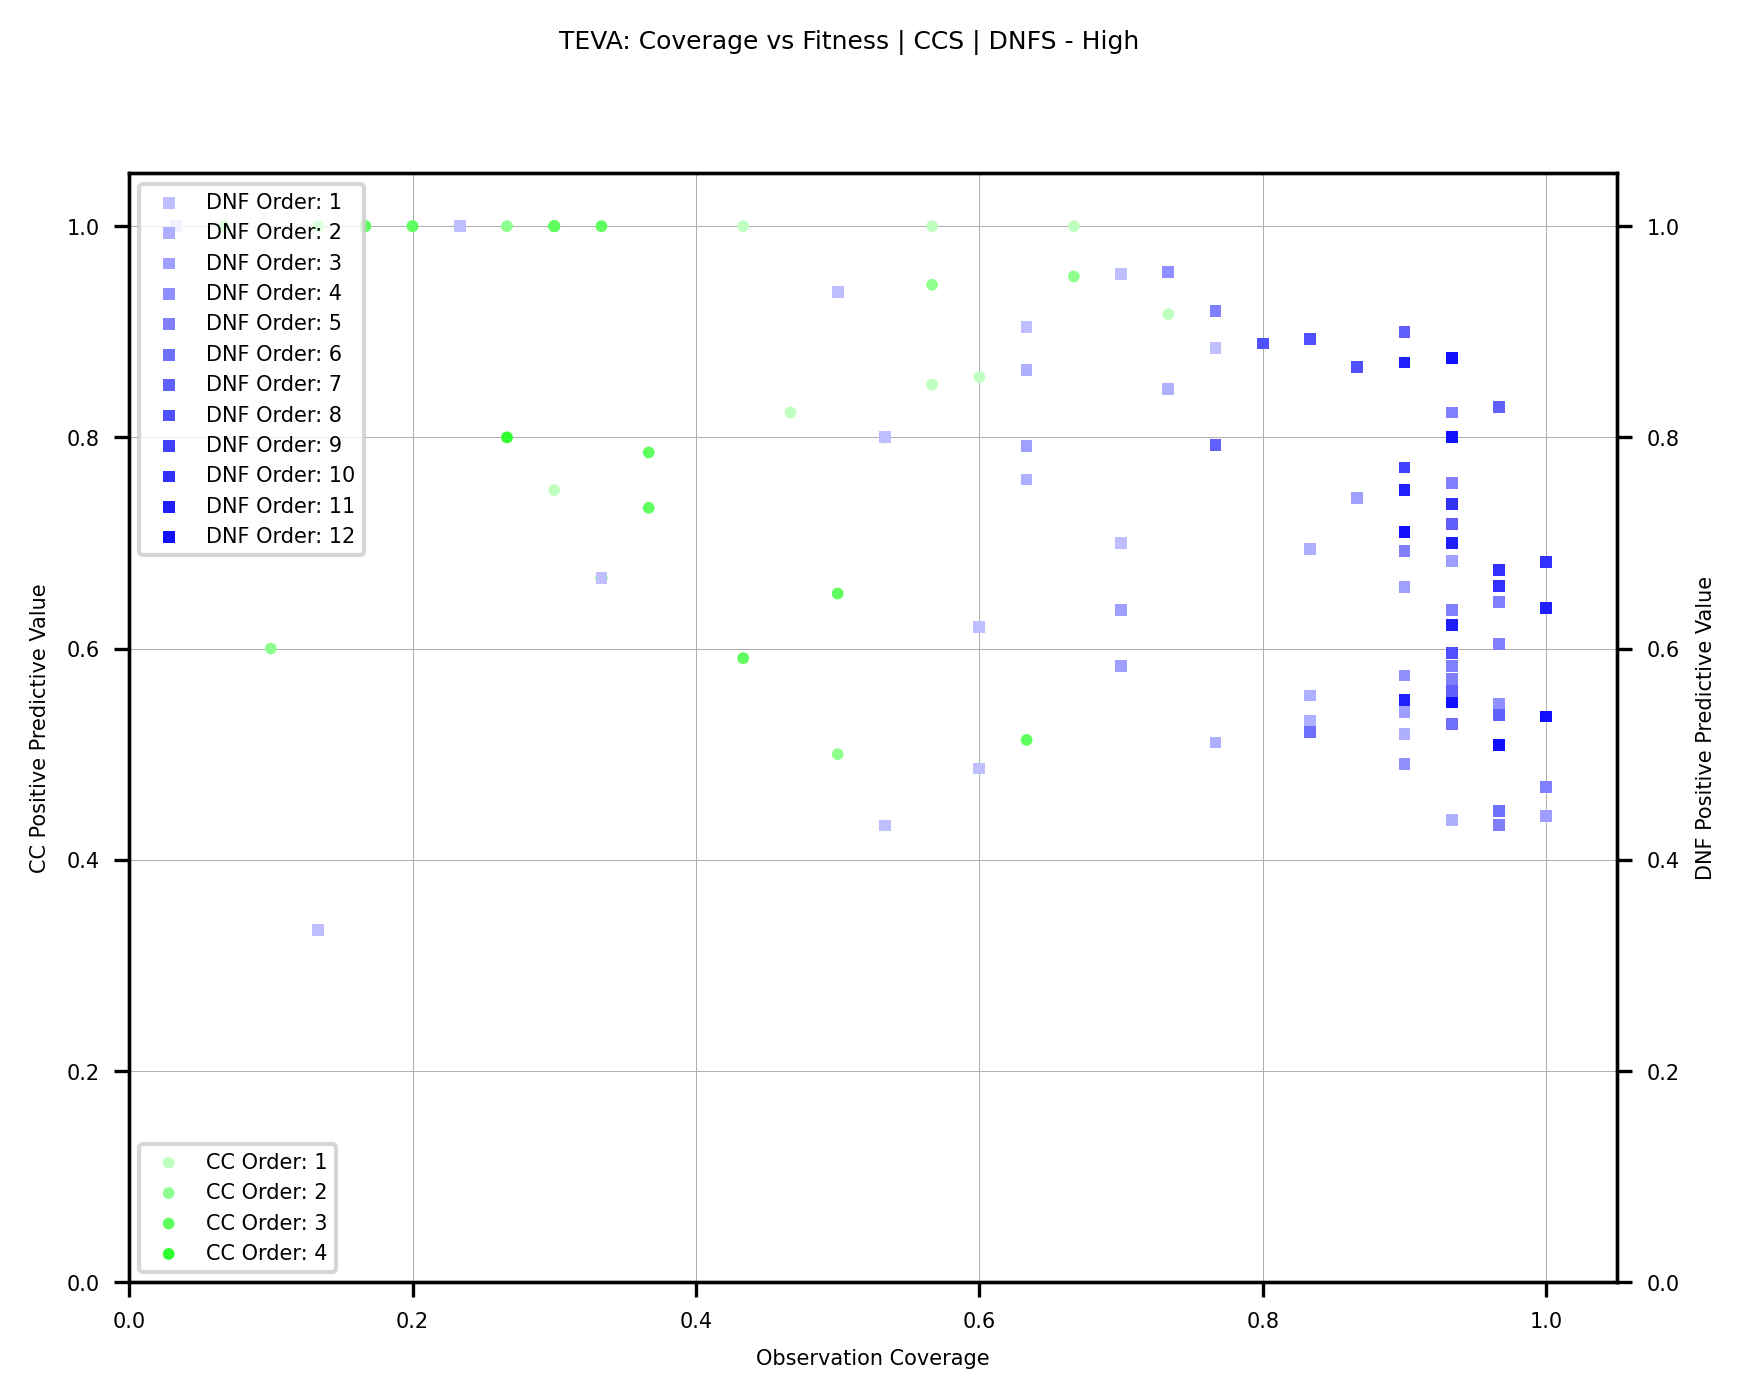

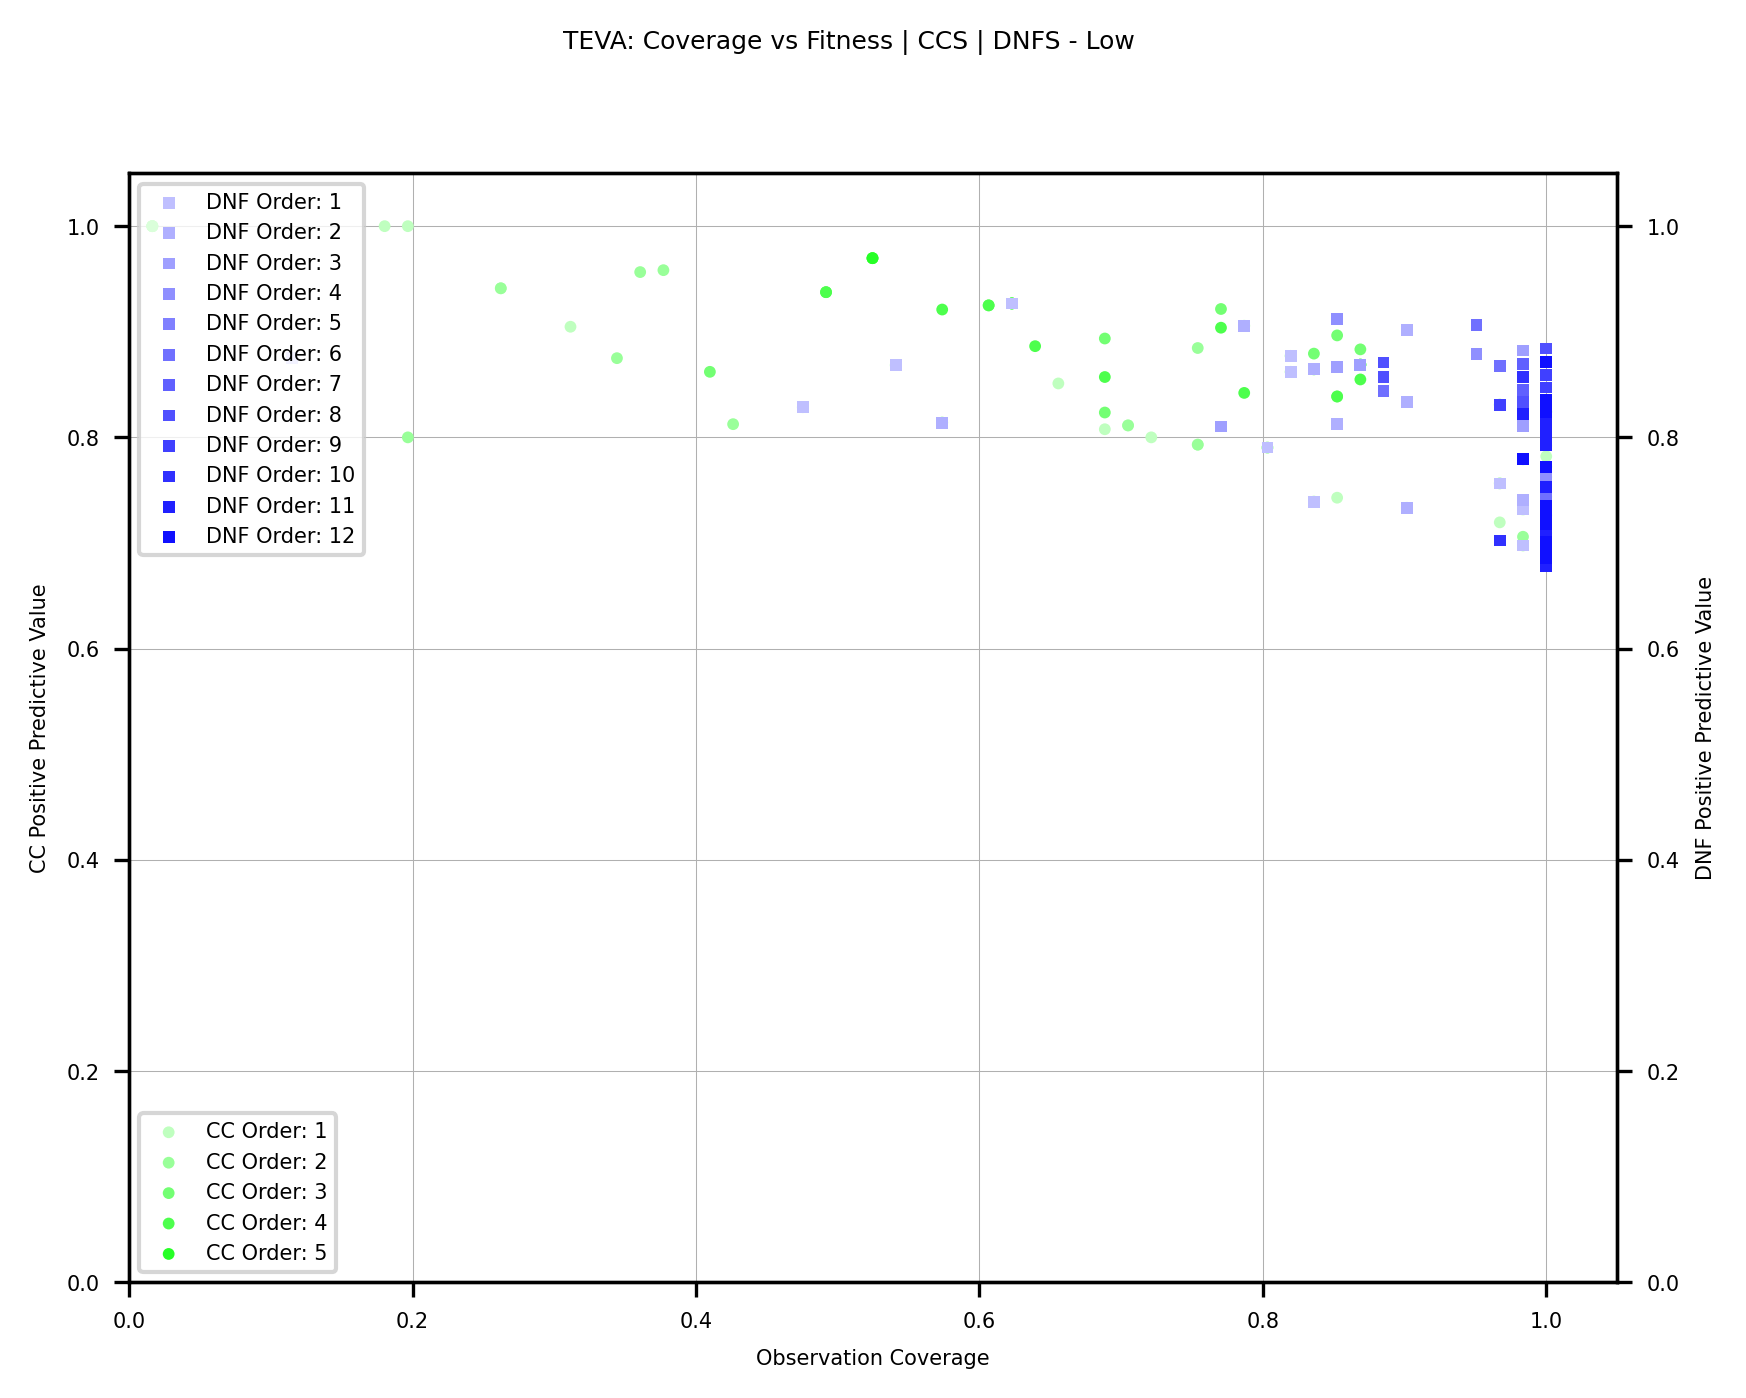

In [4]:
# plot the initial output plots (optional)
teva_alg.plot_all(plot_ccs=True,
                  plot_dnfs=True,
                  plot_contours=True,
                  single_plot=False)

plt.show()

#### Exporting the CCs and DNFs

In [5]:
teva_alg.export("ccs_2DOC_CAMELS.xlsx", "dnfs_2DOC_CAMELS.xlsx")